# 机器学习作业模板
- 姓名：边笛
- 学号：2012668
- 专业：计算机科学与技术

### 实验要求
题目：层次聚类
实验要求：
1. 基本要求：a) 实现single-linkage层次聚类算法。 b) 实现complete-linkage层次聚类算法。
2. 中级要求：a) 实现average-linkage层次聚类算法。 b) 将上述三种算法的性能进行简要对比。
3. 高级要求：通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。

    数据集：数据自行生成
        注：数据包含2000个样例，每个样例的前3列表示特征，第4列表示标签。
**截止日期：12月2日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
MAX_NUM = 1e3

生成数据

In [3]:
def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true

绘制数据

In [4]:
def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X,labels_true,labels_predict=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[predict%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)

生成

In [5]:
centers=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X,labels_true= create_data(centers,2000,0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
np.savetxt('./data.dat',X)
np.savetxt('./label.dat',labels_true)
print("generate data finish!")

generate data finish!


绘制

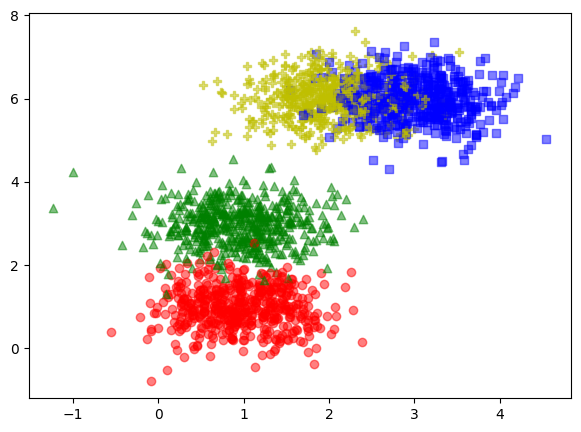

In [6]:
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(1,1,1)
colors='rgbyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(labels_true)):
    ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
    color=colors[labels_true[i]%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)

### 基本要求

实现single-linkage层次聚类算法

In [7]:
def singleLinkage(X):
    # your code
    return np.min(X, axis = 0)

实现complete-linkage层次聚类算法

In [8]:
def completeLinkage(X):
    # your code
    return np.max(X, axis = 0)

### 中级要求

实现average-linkage层次聚类算法

In [9]:
def averageLinkage(X):
    # your code
    return np.mean(X, axis = 0)

聚类模型

In [10]:
class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps=[]

    def fit(self,datas,method):
        self.dataCnt = datas.shape[0]
        
        # 预处理各点之间的距离
        allDist = np.zeros((self.dataCnt,self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i]-datas[j])**2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
#         print("calculate distance finish!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt,self.dataCnt))+MAX_NUM
        for i in range(clusterCount):
            for j in range(i+1,clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
#         print("calculate cluster distance finish!")

        while clusterCount != 1:
            # 最相似的两个聚类
            res = np.argmin(clusterDist)
            dest,src = int(res/clusterCount),res%clusterCount
            # steps进行一次记录
            self.steps.append((setList[dest][0],setList[src][0]))
            # 聚类间距离矩阵更新
            modify = method(clusterDist[[dest,src]])
            clusterDist[dest] = modify
            clusterDist[:,dest] = modify
            clusterDist = np.delete(clusterDist,src,axis=0)
            clusterDist = np.delete(clusterDist,src,axis=1)
            clusterDist[dest][dest] = MAX_NUM
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
#             if (self.dataCnt - clusterCount) % (self.dataCnt / 20) == 0:
#                 print(clusterCount, " clusters left.")

#         print("cluster finish !")

    def label(self,k):
        root = list(range(self.dataCnt))
        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n]=find_root(root[n])
            return root[n]
        for i in range(self.dataCnt-k): # 根据steps记录产生非连通图
            src,dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt): # 将根节点标注为新的cluster
            if i == root[i]: # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt): # 将非根节点标注为根节点的cluster
            if i != root[i]: # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster

聚类测试

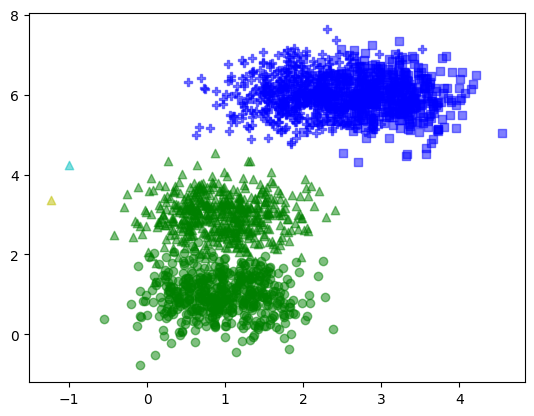

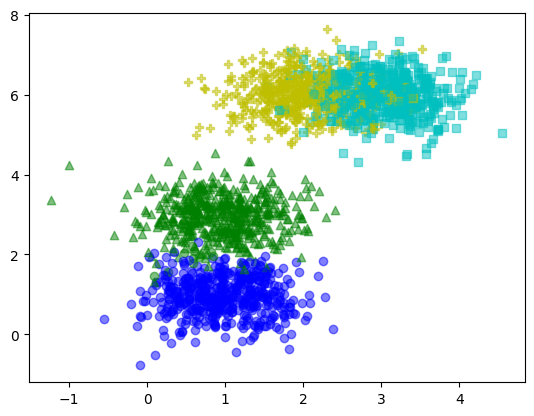

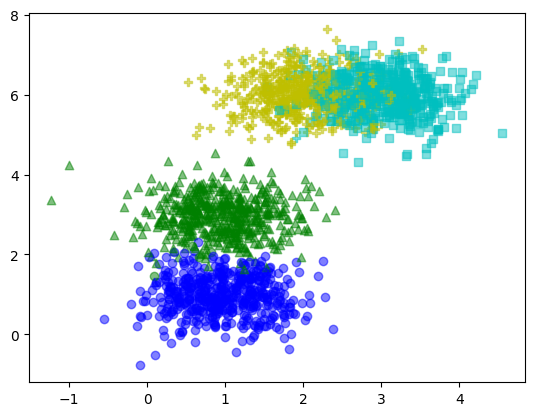

In [11]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 4
labels_predict = []
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X,method)
    plot_data(X,labels_true,model.label(k))
    labels_predict.append(model.label(k))
#     print("-------Segmentation-------")

三种算法性能对比

In [12]:
from sklearn import metrics
acc = []
for i in range(len(labels_predict)):
    acc.append(metrics.adjusted_rand_score(labels_true,labels_predict[i]))


print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("    {:.4f}            {:.4f}              {:.4f}     ".format(acc[0],acc[1],acc[2]))


singleLinkage     completeLinkage     averageLinkage     
    0.4991            0.9775              0.9907     


### 对比分析

- Single Linkage 方法
    类间距离等于两类对象之间的最小距离
- Complete Linkage 方法
    类间距离等于两类对象之间的最大距离
- Average Linkage 方法
    类间距离等于两类对象之间的平均距离
    
使用adjusted_rand_score调整兰德系数，再结合聚类后的分布图，对三种方法的聚类结果做评估。

可以看到Single Linkage聚类结果最差，它可以将中心点距离较远，类别重叠不多的点很好的区分到不同的类别，但如果不同类别中有点的距离比较近，就不好区别出来了。这与算法有着密切的关系，分类的时候类间距离以两类对象中的最小距离判断，很难将重合度大的两类分辨开。

从结果上看Complete Linkage与Average Linkage聚类效果比较接近，这与本身的数据分布有一定的关系。

从算法上看，Complete Linkage的缺陷在于如果两个簇已经非常接近了，但又特殊点相距很远，它们也不会合并，但从实际应用中看可能对于结果正确性的影响会比Single Linkage小一些。Average Linkage散发选择平均值，是两种方法的折中，对于极端情况的应对性会更好一些。

### 高级要求

#### 相同的数据，不同的聚类簇数

K=2

singleLinkage     completeLinkage     averageLinkage     
   6479.64          6479.64           6479.64     


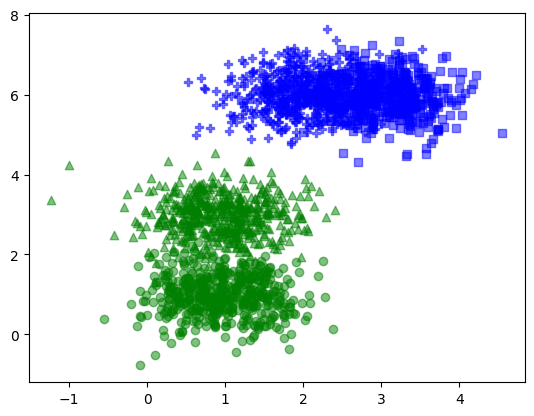

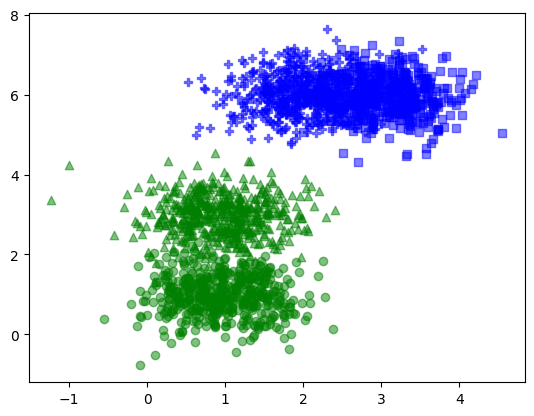

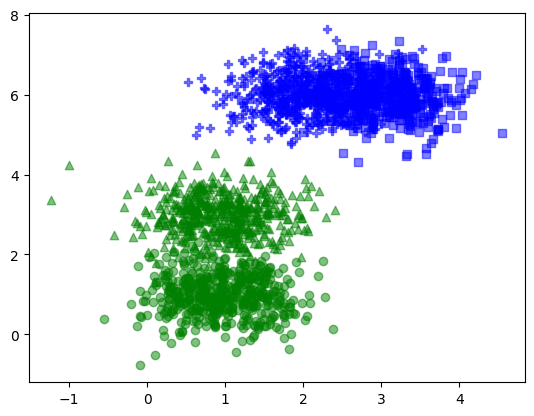

In [13]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 2
acc = []
labels_predict = []
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X,method)
    plot_data(X,labels_true,model.label(k))
    acc.append(metrics.calinski_harabasz_score(X,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("   {:.2f}          {:.2f}           {:.2f}     ".format(acc[0],acc[1],acc[2]))


K=3

singleLinkage     completeLinkage     averageLinkage     
   3243.55          5289.80           5312.54     


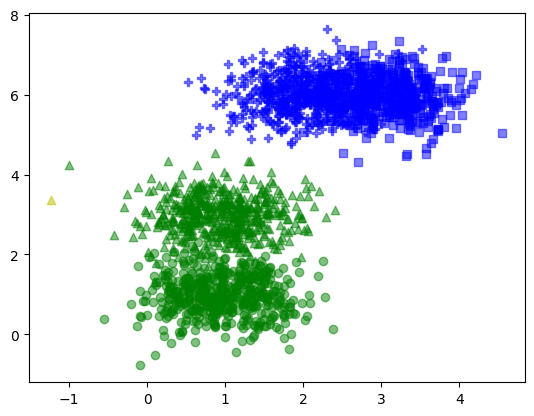

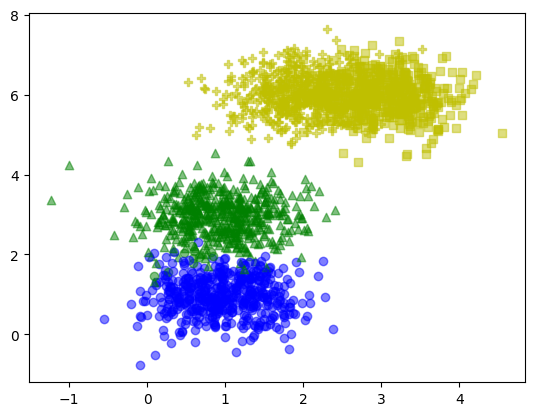

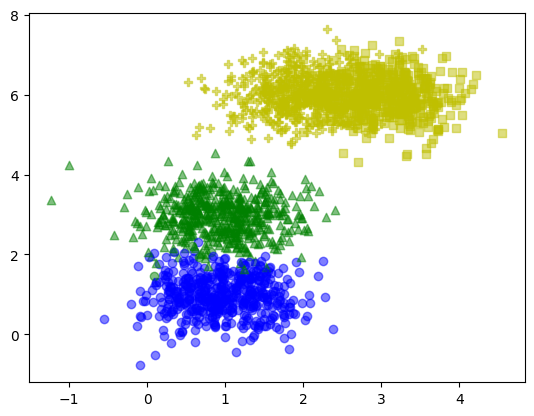

In [14]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 3
acc = []
labels_predict = []
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X,method)
    plot_data(X,labels_true,model.label(k))
    acc.append(metrics.calinski_harabasz_score(X,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("   {:.2f}          {:.2f}           {:.2f}     ".format(acc[0],acc[1],acc[2]))

K=4

singleLinkage     completeLinkage     averageLinkage     
   2166.85          10233.01           10468.42     


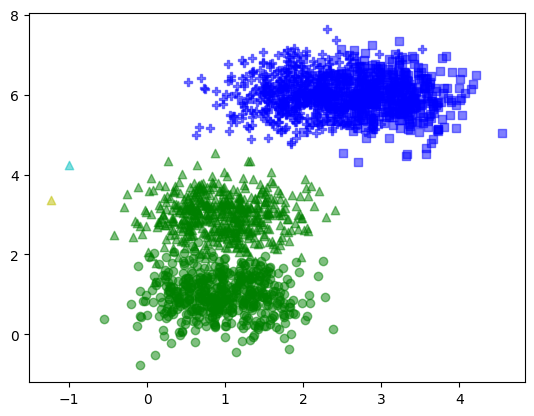

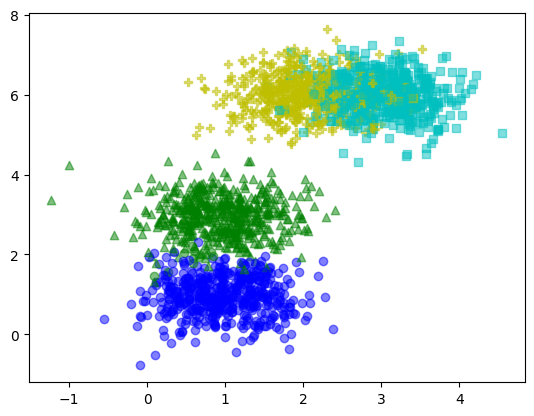

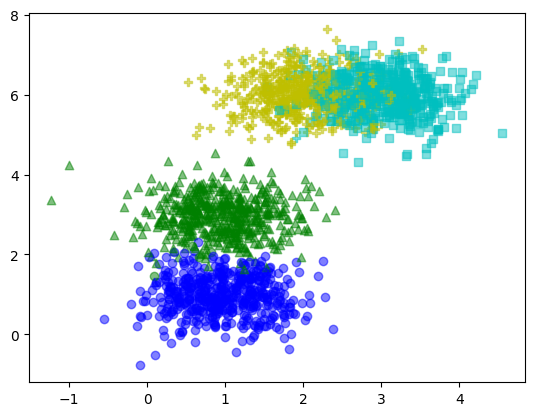

In [15]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 4
acc = []
labels_predict = []
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X,method)
    plot_data(X,labels_true,model.label(k))
    acc.append(metrics.calinski_harabasz_score(X,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("   {:.2f}          {:.2f}           {:.2f}     ".format(acc[0],acc[1],acc[2]))

K=5

singleLinkage     completeLinkage     averageLinkage     
   1627.70          7912.91           8164.73     


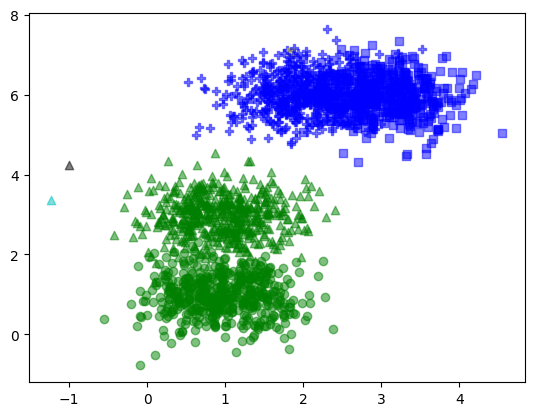

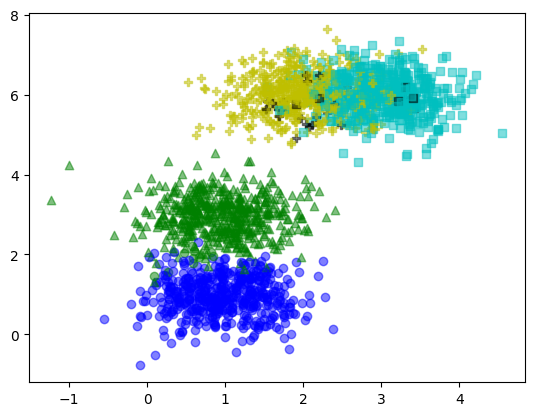

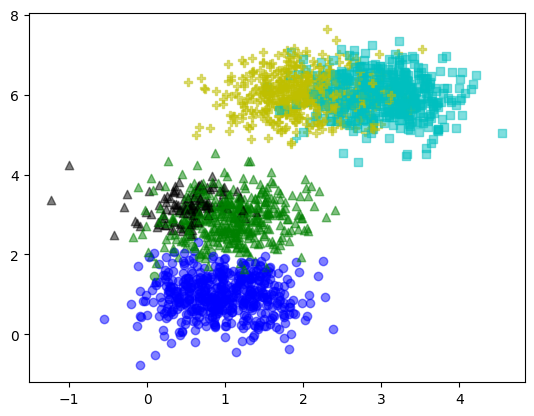

In [16]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 5
acc = []
labels_predict = []
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X,method)
    plot_data(X,labels_true,model.label(k))
    acc.append(metrics.calinski_harabasz_score(X,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("   {:.2f}          {:.2f}           {:.2f}     ".format(acc[0],acc[1],acc[2]))

尝试比较不同分类簇数下的三种方法的分类效果

使用calinski_harabasz_scoreCH指标对分类结果做评估。发现在目标簇数较小时，三种方法都能较好的做好初步分类。

随着分类结果簇数的增加，Single Linkage方法分类效果明显下降，也就是说Single Linkage方法只适合做粗略的分类。相比之下，Complete Linkage和Average Linkage方法分类结果就比较理想，能够在原数据簇数时取得最好的分类结果

#### 相同的中心点，不同的方差

方差 = 0.3

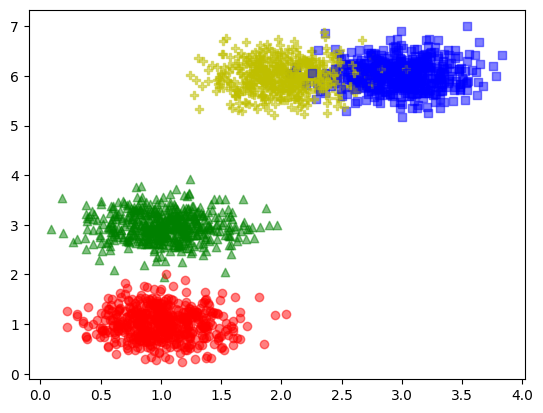

In [17]:
centers1=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X1,labels_true1= create_data(centers1,2000,0.3) # 产生用于聚类的数据集，聚类中心点的个数代表类别数

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
colors='rgbyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(labels_true1)):
    ax.scatter(X1[i,0],X1[i,1],label="cluster %d"%labels_true1[i],
    color=colors[labels_true1[i]%len(colors)],marker=markers[labels_true1[i]%len(markers)],alpha=0.5)

singleLinkage     completeLinkage     averageLinkage     
    1.0000            1.0000              1.0000     


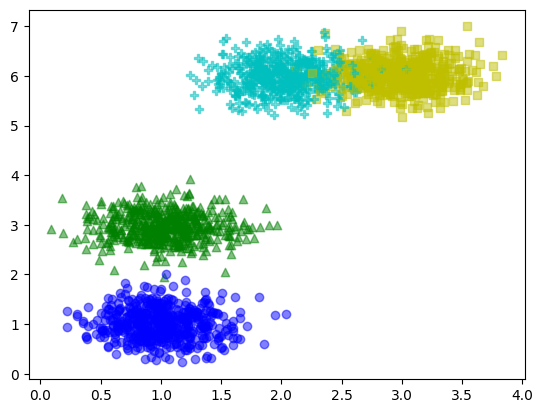

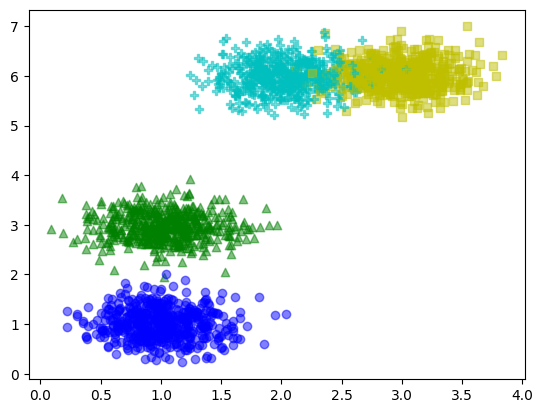

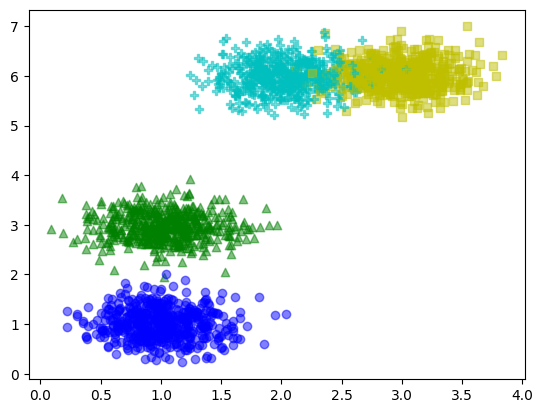

In [18]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 4
acc = []

for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X1,method)
    plot_data(X1,labels_true1,model.label(k))
    acc.append(metrics.adjusted_rand_score(labels_true1,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("    {:.4f}            {:.4f}              {:.4f}     ".format(acc[0],acc[1],acc[2]))

方差 = 0.5

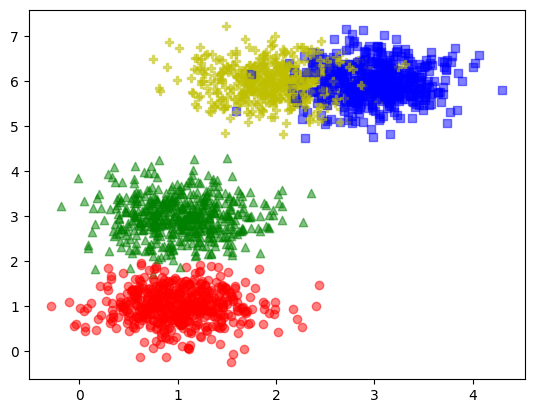

In [19]:
centers2=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X2,labels_true2= create_data(centers2,2000,0.4) # 产生用于聚类的数据集，聚类中心点的个数代表类别数

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

colors='rgbyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(labels_true2)):
    ax.scatter(X2[i,0],X2[i,1],label="cluster %d"%labels_true2[i],
    color=colors[labels_true2[i]%len(colors)],marker=markers[labels_true2[i]%len(markers)],alpha=0.5)

singleLinkage     completeLinkage     averageLinkage     
    0.7133            0.9987              0.9973     


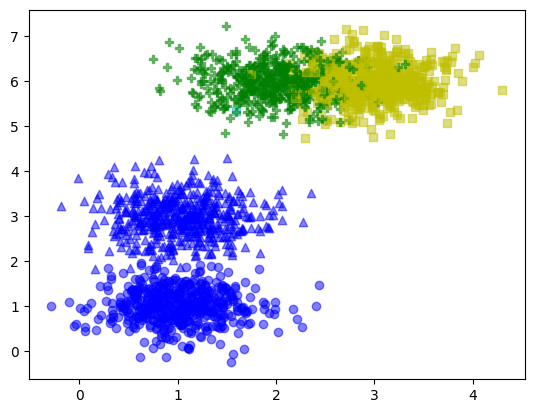

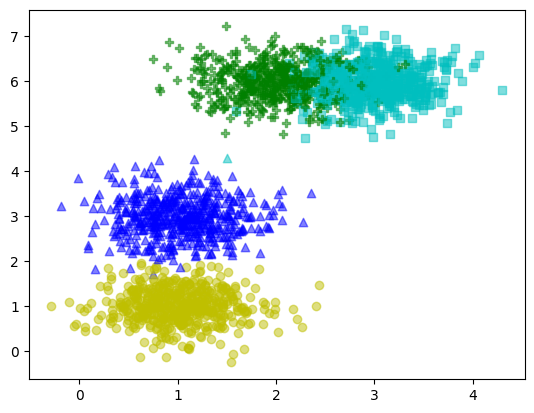

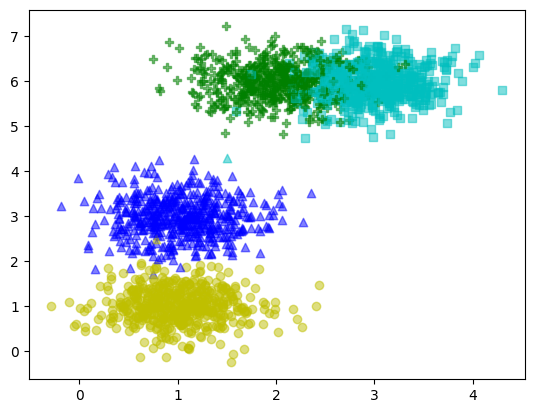

In [20]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 4
acc = []

for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X2,method)
    plot_data(X2,labels_true2,model.label(k))
    acc.append(metrics.adjusted_rand_score(labels_true2,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("    {:.4f}            {:.4f}              {:.4f}     ".format(acc[0],acc[1],acc[2]))

方差 = 0.7

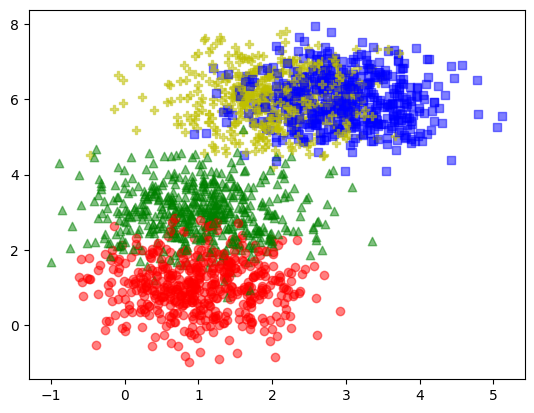

In [21]:
centers3=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X3,labels_true3= create_data(centers3,2000,0.7) # 产生用于聚类的数据集，聚类中心点的个数代表类别数

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

colors='rgbyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(labels_true3)):
    ax.scatter(X3[i,0],X3[i,1],label="cluster %d"%labels_true3[i],
    color=colors[labels_true3[i]%len(colors)],marker=markers[labels_true3[i]%len(markers)],alpha=0.5)

singleLinkage     completeLinkage     averageLinkage     
    -0.0000            0.8351              0.8520     


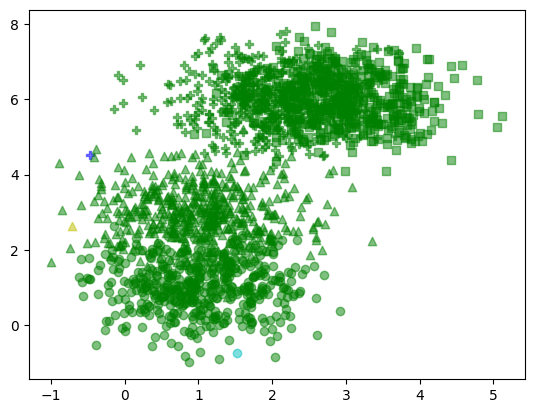

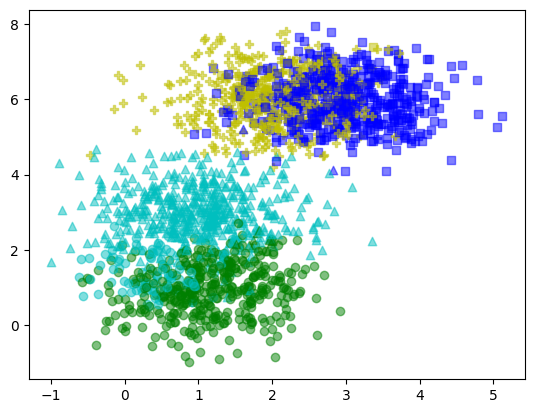

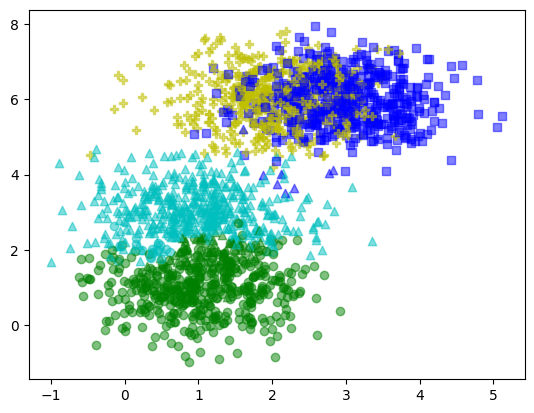

In [22]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 4
acc = []

for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X3,method)
    plot_data(X3,labels_true3,model.label(k))
    acc.append(metrics.adjusted_rand_score(labels_true3,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("    {:.4f}            {:.4f}              {:.4f}     ".format(acc[0],acc[1],acc[2]))

调整原数据方差做聚类

发现当方差较小时三种方法都能很好的完成聚类，但随着方差增大，Single Linkage方法已经明显无法得到合理的分类结果；Complete Linkage和Average Linkage方法分类结果随方差增大先增大后减小。

#### 重新生成数据，簇数改变，方差改变

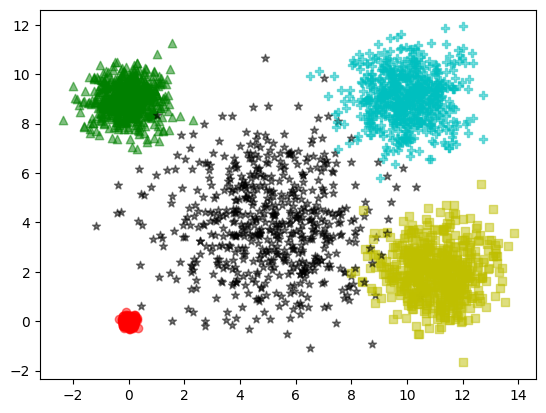

In [23]:
new_centers=[[0,0,1],[0,9,3],[11,2,5],[10,9,7],[5,4,9]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
new_X,new_labels_true= create_data(new_centers,3000,[0.1,0.7,1.0,1.0,2.0]) # 产生用于聚类的数据集，聚类中心点的个数代表类别数


# 展示原数据label标签图
fig=plt.figure() 
ax=fig.add_subplot(1,1,1)
colors='rgyckm' # 每个簇的样本标记不同的颜色
markers='o^sP*DX'
for i in range(len(new_labels_true)):
    ax.scatter(new_X[i,0],new_X[i,1],label="cluster %d"%new_labels_true[i],
    c=colors[new_labels_true[i]%len(colors)],marker=markers[new_labels_true[i]%len(markers)],alpha=0.5)

singleLinkage     completeLinkage     averageLinkage     
    0.2104            0.7210              0.7623     


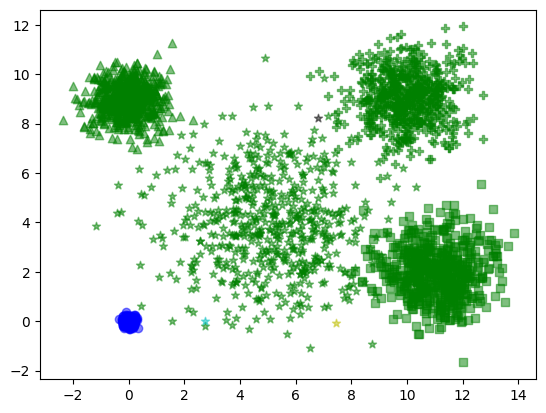

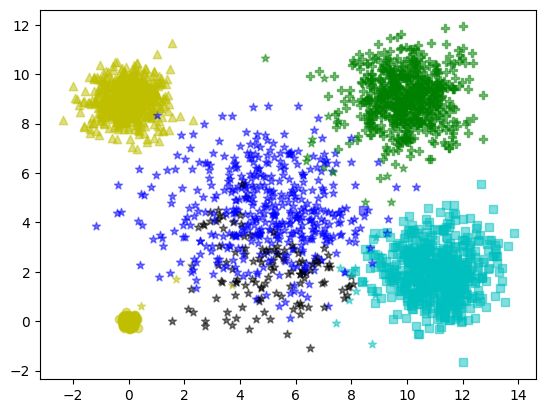

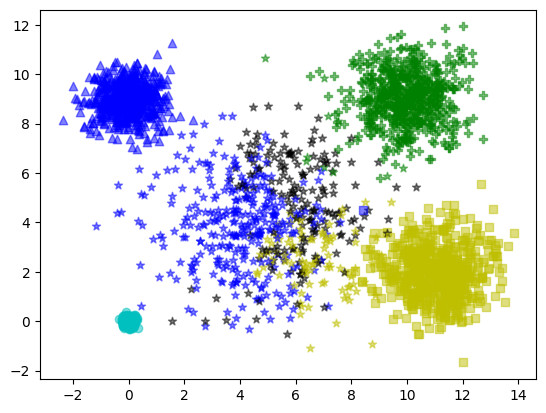

In [24]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
k = 5
acc = []

for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(new_X,method)
    plot_data(new_X,new_labels_true,model.label(k))
    acc.append(metrics.adjusted_rand_score(new_labels_true,model.label(k)))
#     print("-------Segmentation-------")

print("{}     {}     {}     ".format("singleLinkage","completeLinkage","averageLinkage"))
print("    {:.4f}            {:.4f}              {:.4f}     ".format(acc[0],acc[1],acc[2]))

生成其他簇数的数据，设置不同的方差，使用三种方法进行测试：

- Single Linkage方法对于类内方差小，类间距离大的数据得到很好的聚类结果。

- Complete Linkage方法对于方差大的数据聚类效果好，如果类间间距大，效果会更好

- Average Linkage方法对于类内方差小的数据聚类效果比Complete Linkage方法好，但如果方差很小的话还是和Complete Linkage方法一样无法实现正确的聚类；对于类内方差大的数据，聚类效果略差于Complete Linkage方法，但整体也还可以。

